# **Deep Fashion Attribute Prediction**

### Major Steps

1. **Set Up Environment:** Install necessary libraries and tools (TensorFlow/PyTorch, OpenCV, etc.).
2. **EDA and Preprocessing:** Write functions to load and preprocess data.
3. **Define and Compile the Model:** Choose a pre-trained model and adjust it for multi-label classification.
4. **Train the Model:** Train your model, monitoring validation performance.
5. **Write Inference Script:** Develop a script to predict attributes on new images.
6. **Documentation:** Ensure your ReadMe file is comprehensive and clear.

Deployment - Docker \
Generative application \
Fashion GPT \
Extra things

# Environment Setup and Downloading Dataset

In [ ]:
# install statements

In [15]:
# import statements
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

In [4]:
%%capture
# download the dataset zip file


# extract the zip file
!unzip ./classification-assignment.zip;
!rm -rf ./__MACOSX;

# Exploratory Data Analysis

### 1. **Data Inspection**
  Goal: To understand dataset structure and features.
   - **Load the Data:** Import the dataset using pandas or other suitable libraries.
   - **Inspect Data:** Use `head()`, `tail()`, and `sample()` to view parts of the dataset.
   - **Check Data Types:** Use `info()` to check data types and non-null counts.
   - **No of samples and attributes:** Use `.shape` Identify the number of samples and attributes.
   - **Summary Statistics:** Use `describe()` to get summary statistics for numerical columns.

### 2. **Data Cleaning**
   - **Handle Missing Values:**
     - **Identify Missing Values:** Use `isnull().sum()` to find the number of missing values in each column.
     - Determine percentage of missing values for each attribute.
     - **Impute or Remove Missing Values:** Decide whether to impute missing values (using mean, median, mode) or to remove them, based on the data and the problem context.
   - **Handle Duplicates:** Check for and remove duplicate rows using `duplicated()` and `drop_duplicates()`.
   - **Correct Data Types:** Convert columns to appropriate data types (e.g., converting strings to datetime, integers to categories).

### 3. **Univariate Analysis**
   - **Visualize Distributions:** Analyze the distribution of each individual feature.
     - **Histogram:** Use histograms to visualize the distribution of numerical columns.
     - **Box Plot:** Use box plots to identify outliers.
     - **Count Plot:** Use count plots for categorical columns to see the frequency of each category.
   - **Summary Statistics:** Review mean, median, mode, and standard deviation for numerical columns.
   - Identify any skewness or outliers in the data.

### 4. **Bivariate Analysis**

Goal: Examine the relationships between pairs of features.

   - **Relationships Between Variables:** Use scatter plots, correlation matrices, or heatmaps to identify linear or non-linear relationships.
     - **Scatter Plot:** Use scatter plots to visualize relationships between numerical variables.
     - **Correlation Matrix:** Compute and visualize the correlation matrix using heatmaps. Analyze the correlation between features to detect multicollinearity.
     - **Pair Plot:** Use pair plots to visualize relationships between multiple pairs of numerical variables.
   - **Categorical vs Numerical:**
     - **Box Plot:** Compare distributions of a numerical variable across different categories.
     - **Violin Plot:** Similar to box plots but also shows the kernel density estimate.

5. **Categorical Feature Analysis**:
   - Understand the distribution of categorical features
   - Visualize the frequency or percentage of each category
   - Analyze the relationship between categorical features and the target variable

6. **Target Variable Analysis**:
   - Examine the distribution and characteristics of the target variable
   - Identify any imbalances or skewness in the target variable
   - Analyze the relationship between the features and the target variable




### 5. **Multivariate Analysis**
   - **Interaction of Multiple Variables:**
     - **Heatmap:** Use heatmaps to visualize correlations between multiple variables.
     - **Pairwise Plot:** Visualize relationships between pairs of variables using pairwise plots.

### 6. **Feature Engineering**


   - Create new features by combining or transforming existing features
   - Encode categorical features using appropriate techniques (e.g., one-hot encoding, label encoding)
   - Scale numerical features to a common range (e.g., standardization, normalization)
   - **Create New Features:** Derive new features from existing ones that could be useful for the model.
   - **Transform Features:** Apply transformations like scaling, encoding categorical variables, or normalizing.

### 7. **Handling Outliers**
   - **Identify Outliers:** Use IQR, z-scores, or visualizations like box plots to detect outliers.
   - **Treat Outliers:** Decide whether to remove, cap, or transform outliers based on their impact on the analysis.

   - Identify and handle outliers in the dataset
   - Use techniques like z-score, Interquartile Range (IQR), or clustering-based methods
   - Decide whether to remove, impute, or retain the outliers based on the problem context

### 8. **Dimensionality Reduction**
   - **Reduce Dimensions:** Use techniques like PCA (Principal Component Analysis) to reduce the number of features while retaining as much information as possible.


9. **Visualization and Insights**:
   - Create visualizations to summarize the findings from the EDA process
   - Identify patterns, trends, and relationships in the data
   - Derive insights that can inform the subsequent modeling and decision-making steps


### 9. **Documentation and Reporting**
   - **Document Findings:** Record insights, patterns, and anomalies discovered during EDA.
   - **Report Results:** Summarize the EDA process and results in a report or Jupyter Notebook for further reference and analysis.

### Tools and Libraries
- **Python Libraries:** pandas, numpy, matplotlib, seaborn, plotly, scipy
- **Jupyter Notebook:** Ideal for documenting the EDA process interactively.

### Example Code Snippets

#### Load and Inspect Data
```python
import pandas as pd

# Load data
df = pd.read_csv('data.csv')

# Inspect data
print(df.head())
print(df.info())
print(df.describe())
```

#### Handle Missing Values
```python
# Check for missing values
print(df.isnull().sum())

# Impute missing values
df['column'].fillna(df['column'].mean(), inplace=True)
```

#### Univariate Analysis
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram
sns.histplot(df['numerical_column'])
plt.show()

# Box Plot
sns.boxplot(x=df['numerical_column'])
plt.show()

# Count Plot
sns.countplot(x=df['categorical_column'])
plt.show()
```

#### Bivariate Analysis
```python
# Scatter Plot
sns.scatterplot(x='feature1', y='feature2', data=df)
plt.show()

# Correlation Matrix
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()
```

By following these steps, you can conduct a thorough Exploratory Data Analysis, which will help you gain valuable insights into the data and guide your subsequent modeling efforts.

## 3. Exploratory Data Analysis

### 3.1 Dataset Inspection


#### Model Output: Loading the `attributes.csv` file

In [12]:
# load attributes.csv file
attributes_df = pd.read_csv('classification-assignment/attributes.csv')
attributes_df.head()

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,11479107741104-Tommy-Hilfiger-Men-Navy-Blue-St...,6.0,1.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0


In [107]:
# check data-types and non-null counts
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   filename       2238 non-null   object 
 1   neck           1783 non-null   float64
 2   sleeve_length  1786 non-null   float64
 3   pattern        1791 non-null   float64
dtypes: float64(3), object(1)
memory usage: 70.1+ KB


There are total 2238 entries in the `attributes.csv` file. This means there are more entries than images.

Each attribute column has null values.

In [108]:
attributes_df.describe()

,neck,sleeve_length,pattern
count,1783.000000,1786.000000,1791.000000
mean,4.487942,2.543673,8.132887
std,2.069430,0.915810,2.108823
min,0.000000,0.000000,0.000000
25%,3.000000,3.000000,9.000000
50%,6.000000,3.000000,9.000000
75%,6.000000,3.000000,9.000000
max,6.000000,3.000000,9.000000



#### Model Input: Loading the images

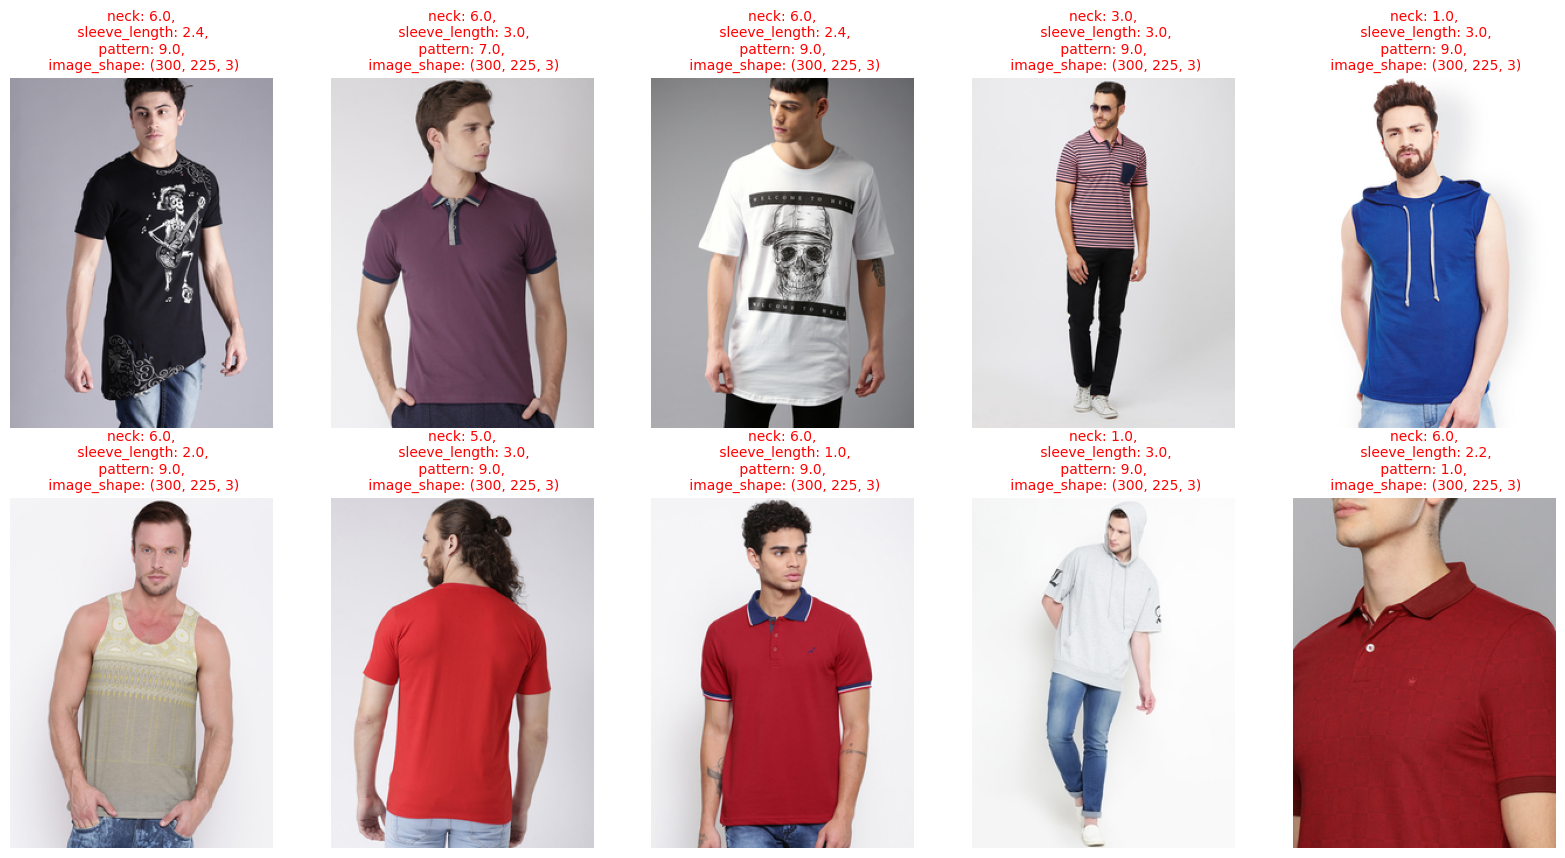

In [25]:
# Function to get attribute values for a given file name
def get_attributes(df, file_name):
    attribute_cols = ['neck', 'sleeve_length', 'pattern']
    attributes = df[df['filename'] == file_name][attribute_cols].values[0]
    return attributes


# List of all image file names in the directory
file_names = os.listdir("./classification-assignment/images")

# Select 10 random images
random_images = random.sample(file_names, 10)

# Create a figure with 1 row and required columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

# Load and display each image
for i, image_file in enumerate(random_images):
    img = plt.imread(os.path.join("./classification-assignment/images", image_file))
    ax = axes[i // 5, i % 5]
    ax.imshow(img)
    ax.axis('off')

    # Write the attributes at the bottom of the image
    attributes = get_attributes(attributes_df, image_file)
    display_str = f"neck: {attributes[0]},\n sleeve_length: {attributes[1]},\n pattern: {attributes[2]}, \n image_shape: {img.shape}"
    axes[i // 5, i % 5].set_title(display_str, fontsize=10, color='red')

plt.show()

In [11]:
print("Number of files:", len(file_names))

extensions = [name.split(".")[-1] for name in file_names]
extensions_count = pd.Series(extensions).value_counts()
print("Extensions:", extensions_count)

Number of files: 1783
Extensions: jpg    1782
db        1
Name: count, dtype: int64


We only have 1782 images in the directory.

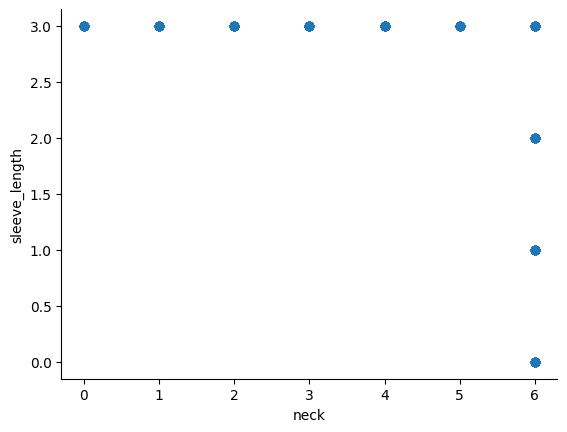

In [31]:
# @title neck vs sleeve_length

from matplotlib import pyplot as plt
attributes_df.plot(kind='scatter', x='neck', y='sleeve_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

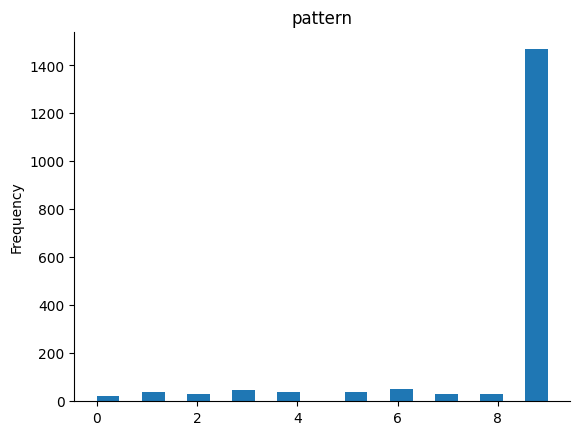

In [30]:
# @title pattern

from matplotlib import pyplot as plt
attributes_df['pattern'].plot(kind='hist', bins=20, title='pattern')
plt.gca().spines[['top', 'right',]].set_visible(False)

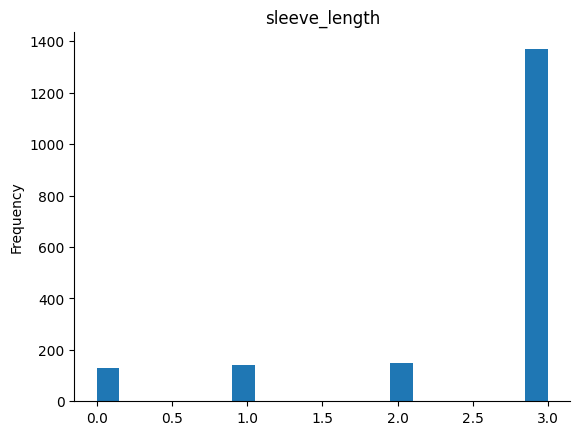

In [29]:
# @title sleeve_length

from matplotlib import pyplot as plt
attributes_df['sleeve_length'].plot(kind='hist', bins=20, title='sleeve_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

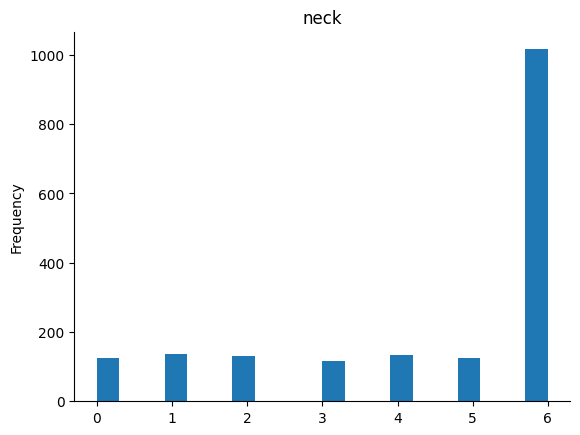

In [11]:
# @title neck

from matplotlib import pyplot as plt
attributes_df['neck'].plot(kind='hist', bins=20, title='neck')
plt.gca().spines[['top', 'right',]].set_visible(False)

### 3.2 Data Cleaning

#### Removing files with wrong extension

In [32]:
image_files = [name for name in file_names if name.split(".")[-1] == "jpg"]
print(f"Number of valid image files: {len(image_files)}")

# checking for duplicates, and optimizing for membership testing
image_set = set(image_files)
print(f"Number of valid image files without duplicates: {len(image_set)}")
print(image_set)

Number of valid image files: 1782
Number of valid image files without duplicates: 1782
{'e6fb0d77-cb0b-474b-b77a-d7edc54c671b1533535805749-Puma-Men-Black--Grey-Coloublocked-Hooded-Run-DRY-CELL-T-shirt-8361533535805667-6.jpg', 'abbf075a-e2ec-4fe0-bb0b-2676baf4d5dd1537273868711-GAP-Mens-Grey-Essential-Short-Sleeve-Striped-Pocket-T-Shirt-871537273868535-1.jpg', 'b2b60732-0a53-43ef-ba9f-39004c8806eb1531387689418-Louis-Philippe-Jeans-Men-Tshirts-1661531387689286-3.jpg', '11510986746021-Monte-Carlo-Men-Tshirts-5611510986745928-5.jpg', 'ee808a6b-0295-45d8-90ed-470a96acd27f1528202642169-Raglan-Military-Sleeves-Full-Sleeves-Round-Neck-4131528202641950-1.jpg', 'ec4a6f2f-a45e-4a59-b98b-10adf566c1721535008439715-Kappa-Men-Navy-Blue-Striped-Polo-Collar-T-shirt-195153500843-2.jpg', '11522224397733-Marvel-Mens-Black-Jaspe-Color-Half-Sleeve-T-shirtSize--S-561522224397558-1.jpg', '11493718611953-Wrangler-Men-Orange-Solid-Round-Neck-T-shirt-2651493718611837-4.jpg', '11525770940499-na-9741525770940351-4.

#### Removing extra entries from labels

In [33]:
# prompt: make a new dataframe from attributes_df, keep the row is the filename is present in image_set

attributes_df = attributes_df[attributes_df['filename'].isin(image_set)]
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1795 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   filename       1795 non-null   object 
 1   neck           1795 non-null   float64
 2   sleeve_length  1795 non-null   float64
 3   pattern        1795 non-null   float64
dtypes: float64(3), object(1)
memory usage: 70.1+ KB


In [112]:
attributes_df.head(20)

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,NaN,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,NaN,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0
5,11505295751483-FOREVER-21-Men-White-Self-Desig...,1.0,3.0,NaN
7,11461827372049-US-Polo-Assn-Navy-T-shirt-20714...,5.0,3.0,9.0
8,90044561-8959-460a-a650-49a6772237931537435887...,NaN,NaN,9.0
9,f617edb8-a874-453b-b6d3-fb860248d5191532955920...,4.0,3.0,9.0
10,11520918258005-Vudu-Mens-Casual-Grey-Color-T-S...,6.0,NaN,9.0
11,11519017746785-Difference-of-Opinion-Khaki-Pri...,6.0,3.0,NaN


In [29]:
# checking for duplicates in attributes_df
duplicate_filenames = attributes_df['filename'].duplicated()
print(f"Number of duplicate filenames: {duplicate_filenames.sum()}")

duplicate_rows = attributes_df[attributes_df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))

Number of duplicate filenames: 15
Number of duplicate rows: 2


This means that there are 15 rows with duplicate filenames but different attribute values.
Out of these 15 duplicates only 1 entry has the same filename and attribute values.

In [84]:
list(attributes_df['filename'][duplicate_filenames])
# print(list(duplicate_rows['filename']))

['11519985443093-na-6291519985442963-1.jpg',
 '3d2204b9-8db8-41bc-9e6e-7dcbd0e5bfd81527921368221-Roadster-Men-Beige-Printed-Round-Neck-T-shirt-51915279213668-2.jpg',
 '184ee860-cb0c-43e9-a59f-b087d9517e971535628417104-MESH-HOODED-VEST-2301535628416957-4.jpg',
 '11500972213413-HERENOW-Men-Navy-Blue-Solid-Henley-Neck-T-shirt-1741500972213293-2.jpg',
 'f617edb8-a874-453b-b6d3-fb860248d5191532955920783-Moda-Rapido-Men-Black-Solid-Round-Neck-T-shirt-2601532955919-6.jpg',
 '11520422272285-Tommy-Hilfiger-Men-Grey-Solid-Polo-Collar-Slim-Fit-T-shirt-8161520422272040-2.jpg',
 '22c51074-4ad3-4c3a-aa2f-9753849ebde51530877671885-Skult-Mens-Black-Vest-5971530877670515-1.jpg',
 '11521455242291-IndigoGrey-Melange-Sleeveless-Hooded-T-shirt-6401521455242152-3.jpg',
 'de641692-4912-4b0b-a2d8-f29b83570be91528788286482-na-4921528788286379-4.jpg',
 'cd9b9487-f147-4e06-ae2c-9759d4d67e6b1527144425607-Hypernation-Men-Olive-Green-Colourblocked-Round-Neck-T-shirt-911527144425422-2.jpg',
 '11520494542273-na-45015

In [30]:
# Removing the exact duplicate
attributes_df = attributes_df.drop_duplicates()
attributes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2237
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   filename       2236 non-null   object 
 1   neck           2236 non-null   float64
 2   sleeve_length  2236 non-null   float64
 3   pattern        2236 non-null   float64
dtypes: float64(3), object(1)
memory usage: 87.3+ KB


In [ ]:
# What to do with other duplicates?

### Handling Missing Values

In [117]:
attributes_df.isnull().sum()

filename         0
neck             0
sleeve_length    0
pattern          0
dtype: int64

In [92]:
print(f" Total rows in attributes: {attributes_df.shape[0]}")
df_remove = attributes_df.dropna(axis = 0)
print(f" Total rows after dropping missing value: {df_remove.shape[0]}")

print(f"Loss of data: {round((attributes_df.shape[0] - df_remove.shape[0])*100/attributes_df.shape[0],2)} %")

 Total rows in attributes: 1796
 Total rows after dropping missing value: 906
Loss of data: 49.55 %


We simply cannot drop the rows with the missing values because this would result in a loss of approximately 50% of data.

There are many imputation methods for imputing missing values. There is usually a pattern which these attributes follow when they come together. As the values are categorical in nature, choosing a method which can infer the missing values, from other columns can be benficial.

Due to this I am picking imputation using k-Nearest Neighbors method.

KNNImputer is better in this case, than IterativeImputer.

KNNImputer uses the k-nearest neighbors algorithm to impute missing values. This means that it looks at the k most similar data points to the data point with the missing value and uses the values of those data points to impute the missing value. This method is particularly well-suited for categorical data, as it can take into account the relationships between different categories.

IterativeImputer, on the other hand, uses a regression model to impute missing values. This means that it fits a regression model to the non-missing data and then uses the model to predict the missing values. This method is not as well-suited for categorical data, as it does not take into account the relationships between different categories.

Therefore, KNNImputer is the better choice for imputing missing values in this case.

In [34]:
# Performing imputation using kNN method
from sklearn.impute import KNNImputer

# Select the columns with missing values
cols_with_missing = ['neck', 'sleeve_length', 'pattern']

# Create the KNN imputer
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

# Impute the missing values
attributes_df[cols_with_missing] = knn_imputer.fit_transform(attributes_df[cols_with_missing])

# Check for missing values
attributes_df.isnull().sum()

filename         0
neck             0
sleeve_length    0
pattern          0
dtype: int64

In [15]:
attributes_df.head(10)

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,3.0,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
2,11479107741104-Tommy-Hilfiger-Men-Navy-Blue-St...,6.0,1.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,5.6,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0
5,11505295751483-FOREVER-21-Men-White-Self-Desig...,1.0,3.0,6.4
6,11519111005679-United-Colors-of-Benetton-Men-B...,5.0,3.0,9.0
7,11461827372049-US-Polo-Assn-Navy-T-shirt-20714...,5.0,3.0,9.0
8,90044561-8959-460a-a650-49a6772237931537435887...,2.8,2.4,9.0
9,f617edb8-a874-453b-b6d3-fb860248d5191532955920...,4.0,3.0,9.0


## 4. Data Preprocessing Steps based on EDA

In [35]:
attributes_df.head(10)

,filename,neck,sleeve_length,pattern
0,cdc8cd2a-0938-4970-a3b5-f5ed9595222c1527925869...,6.0,3.0,4.0
1,11469770662809-Metersbonwe-Navy-T-shirt-485146...,5.0,3.0,9.0
3,f7ad67ab-eeb1-4449-8f63-7b580d2797e71532342804...,5.6,0.0,9.0
4,11516770810185-Splash-Men-Tshirts-767151677081...,6.0,3.0,9.0
5,11505295751483-FOREVER-21-Men-White-Self-Desig...,1.0,3.0,6.4
7,11461827372049-US-Polo-Assn-Navy-T-shirt-20714...,5.0,3.0,9.0
8,90044561-8959-460a-a650-49a6772237931537435887...,2.8,2.4,9.0
9,f617edb8-a874-453b-b6d3-fb860248d5191532955920...,4.0,3.0,9.0
10,11520918258005-Vudu-Mens-Casual-Grey-Color-T-S...,6.0,2.4,9.0
11,11519017746785-Difference-of-Opinion-Khaki-Pri...,6.0,3.0,7.0


# Model Definition and Compilation

For the task I am selecting ResNet50, with its output layers modified.

In [36]:
import tensorflow as tf
from tensorflow.keras.utils import Sequence
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

class MultiOutputDataGenerator(Sequence):
    def __init__(self, df, image_dir, batch_size, input_size, shuffle=True, augment=False):
        self.df = df
        self.image_dir = image_dir
        self.batch_size = batch_size
        self.input_size = input_size
        self.shuffle = shuffle
        self.augment = augment
        self.indices = np.arange(len(self.df))
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.df) / self.batch_size))

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indices)

    def __getitem__(self, index):
        indices = self.indices[index*self.batch_size:(index+1)*self.batch_size]
        batch_df = self.df.iloc[indices]

        X, y_neck, y_sleeve_length, y_pattern = self.__data_generation(batch_df)

        return X, {'neck_output': y_neck, 'sleeve_length_output': y_sleeve_length, 'pattern_output': y_pattern}

    def __data_generation(self, batch_df):
        X = np.empty((self.batch_size, *self.input_size))
        y_neck = np.empty((self.batch_size, num_classes_neck), dtype=int)
        y_sleeve_length = np.empty((self.batch_size, num_classes_sleeve_length), dtype=int)
        y_pattern = np.empty((self.batch_size, num_classes_pattern), dtype=int)

        for i, (index, row) in enumerate(batch_df.iterrows()):
            img_path = os.path.join(self.image_dir, row['filename'])
            img = load_img(img_path, target_size=self.input_size[:2])
            img = img_to_array(img) / 255.0

            X[i,] = img
            y_neck[i,] = tf.keras.utils.to_categorical(row['neck'], num_classes_neck)
            y_sleeve_length[i,] = tf.keras.utils.to_categorical(row['sleeve_length'], num_classes_sleeve_length)
            y_pattern[i,] = tf.keras.utils.to_categorical(row['pattern'], num_classes_pattern)

        return X, y_neck, y_sleeve_length, y_pattern

# Parameters
input_shape = (224, 224, 3)
batch_size = 32
epochs = 20

# Number of classes for each attribute
num_classes_neck = 7
num_classes_sleeve_length = 4
num_classes_pattern = 10

# Load the DataFrame with image filenames and labels
# attributes_df = pd.read_csv(./classification-assignment/att)  # Replace with the actual path

# Split into training and validation sets
train_df = attributes_df.sample(frac=0.8, random_state=42)
valid_df = attributes_df.drop(train_df.index)

# Create data generators
train_generator = MultiOutputDataGenerator(train_df, './classification-assignment/images', batch_size, input_shape, shuffle=True, augment=True)
valid_generator = MultiOutputDataGenerator(valid_df, './classification-assignment/images', batch_size, input_shape, shuffle=False, augment=False)

# Load the ResNet50 model with pre-trained ImageNet weights, exclude top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers for each attribute
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)

output_neck = Dense(num_classes_neck, activation='softmax', name='neck_output')(x)
output_sleeve_length = Dense(num_classes_sleeve_length, activation='softmax', name='sleeve_length_output')(x)
output_pattern = Dense(num_classes_pattern, activation='softmax', name='pattern_output')(x)

model = Model(inputs=base_model.input, outputs=[output_neck, output_sleeve_length, output_pattern])

# Compile the model
model.compile(optimizer=Adam(),
              loss={'neck_output': 'categorical_crossentropy',
                    'sleeve_length_output': 'categorical_crossentropy',
                    'pattern_output': 'categorical_crossentropy'},
              metrics={'neck_output': 'accuracy',
                       'sleeve_length_output': 'accuracy',
                       'pattern_output': 'accuracy'})

# Training the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator
)


Epoch 1/20
44/44 [==============================] - 403s 9s/step - loss: 13.7523 - neck_output_loss: 5.1836 - sleeve_length_output_loss: 4.1779 - pattern_output_loss: 4.3908 - neck_output_accuracy: 0.3672 - sleeve_length_output_accuracy: 0.5270 - pattern_output_accuracy: 0.5178 - val_loss: 4.1439 - val_neck_output_loss: 1.6664 - val_sleeve_length_output_loss: 1.0261 - val_pattern_output_loss: 1.4514 - val_neck_output_accuracy: 0.4972 - val_sleeve_length_output_accuracy: 0.6449 - val_pattern_output_accuracy: 0.6989
Epoch 2/20
44/44 [==============================] - 389s 9s/step - loss: 4.4726 - neck_output_loss: 1.7819 - sleeve_length_output_loss: 1.1072 - pattern_output_loss: 1.5836 - neck_output_accuracy: 0.4808 - sleeve_length_output_accuracy: 0.6534 - pattern_output_accuracy: 0.6925 - val_loss: 3.7928 - val_neck_output_loss: 1.5718 - val_sleeve_length_output_loss: 0.9968 - val_pattern_output_loss: 1.2242 - val_neck_output_accuracy: 0.4972 - val_sleeve_length_output_accuracy: 0.6449

In [37]:
model.save('resnet50_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Hyperparameter Selection and Training

# Testing and Evaluation

# Inference Script

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the pre-trained model for inference
model = tf.keras.models.load_model('resnet50_model.h5')

# Function to preprocess a single image
def preprocess_image(img_path, target_size):
    img = load_img(img_path, target_size=target_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0
    return img

# Function to get attribute predictions for a batch of images
def predict_attributes(image_paths):
    predictions = []

    for img_path in image_paths:
        img = preprocess_image(img_path, (224, 224))
        preds = model.predict(img)

        neck_pred = np.argmax(preds[0], axis=1)[0]
        sleeve_length_pred = np.argmax(preds[1], axis=1)[0]
        pattern_pred = np.argmax(preds[2], axis=1)[0]

        predictions.append({
            'filename': img_path,
            'neck': neck_pred,
            'sleeve_length': sleeve_length_pred,
            'pattern': pattern_pred
        })

    return pd.DataFrame(predictions)

# Example usage:
image_directory = './test_images'  # Replace with the path to your image directory
image_paths = [os.path.join(image_directory, fname) for fname in os.listdir(image_directory) if fname.endswith('.jpg')]

predicted_attributes = predict_attributes(image_paths)
print(predicted_attributes)
